In [1]:
import pandas as pd
import numpy as np
from multiprocessing import Pool
from functools import partial
import glob
import os
import plotly.express as px
import math
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats, special
from statsmodels.stats import multitest
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.io as pio
import seaborn as sns

from functools import reduce

plt.rcParams['svg.fonttype'] = 'none'

base_dir = "http://bartzabel.ls.manchester.ac.uk/orozcolab/SNP2Mechanism/"

In [2]:
RNA_permuted_CD4 = pd.read_csv(f"{base_dir}/QTLs/RNA/RNA_permuted_CD4_FDR.txt", sep = " ")
RNA_permuted_CD8 = pd.read_csv(f"{base_dir}/QTLs/RNA/RNA_permuted_CD8_FDR.txt", sep = " ")

In [4]:
RNA_nominal_CD4 = pd.read_csv(f"{base_dir}/QTLs/RNA/RNA_nominal_CD4_merged.txt", sep = " ")
RNA_nominal_CD8 = pd.read_csv(f"{base_dir}/QTLs/RNA/RNA_nominal_CD8_merged.txt", sep = " ")

In [6]:
RNA_permuted_CD4 = RNA_permuted_CD4[RNA_permuted_CD4["FDR"] < 0.10]
RNA_permuted_CD8 = RNA_permuted_CD8[RNA_permuted_CD8["FDR"] < 0.10]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1015 848 0.8354679802955665


<Figure size 800x600 with 0 Axes>

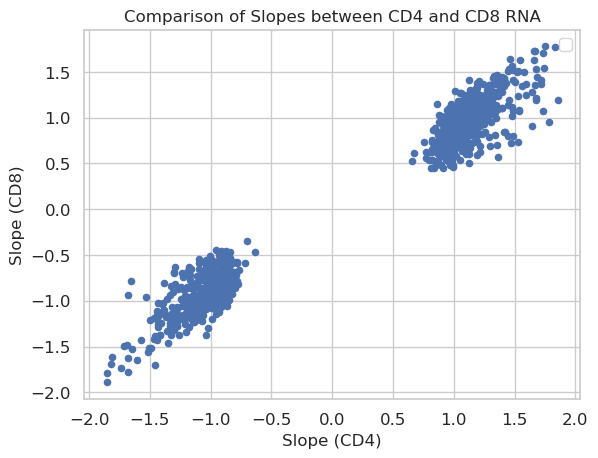

In [45]:
df = RNA_permuted_CD4.merge(RNA_nominal_CD8, on = ["var_id", "phe_id"], suffixes = ("_permuted_CD4", "_nominal_CD8"))
print(len(RNA_permuted_CD4), len(df), len(df) / len(RNA_permuted_CD4))
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Plot the data
fig = df.plot(kind='scatter', x='slope_permuted_CD4', y='slope_nominal_CD8')

# Set the axis labels
plt.xlabel('Slope (CD4)')
plt.ylabel('Slope (CD8)')

# Set the title
plt.title('Comparison of Slopes between CD4 and CD8 RNA')

# Set the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
fig.get_figure().savefig("output_figs/eqtl_slope_comparison_CD4.png", dpi = 600)
fig.get_figure().savefig("output_figs/eqtl_slope_comparison_CD4.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1609 1229 0.7638284648850218


<Figure size 800x600 with 0 Axes>

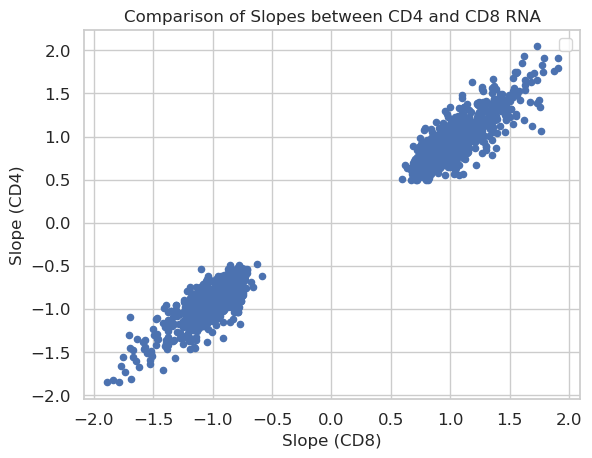

In [44]:
df = RNA_permuted_CD8.merge(RNA_nominal_CD4, on = ["var_id", "phe_id"], suffixes = ("_permuted_CD8", "_nominal_CD4"))
print(len(RNA_permuted_CD8), len(df), len(df) / len(RNA_permuted_CD8))
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Plot the data
fig = df.plot(kind='scatter', x='slope_permuted_CD8', y='slope_nominal_CD4')

# Set the axis labels
plt.xlabel('Slope (CD8)')
plt.ylabel('Slope (CD4)')

# Set the title
plt.title('Comparison of Slopes between CD4 and CD8 RNA')

# Set the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
fig.get_figure().savefig("output_figs/eqtl_slope_comparison_CD8.png", dpi = 600)
fig.get_figure().savefig("output_figs/eqtl_slope_comparison_CD8.svg")

In [19]:
ATAC_permuted_CD4 = pd.read_csv(f"{base_dir}/QTLs/ATAC/ATAC_permuted_CD4_FDR.txt", sep = " ")
ATAC_permuted_CD8 = pd.read_csv(f"{base_dir}/QTLs/ATAC/ATAC_permuted_CD8_FDR.txt", sep = " ")

In [20]:
ATAC_nominal_CD4 = pd.read_csv(f"{base_dir}/QTLs/ATAC/ATAC_nominal_CD4_merged.txt", sep = " ")
ATAC_nominal_CD8 = pd.read_csv(f"{base_dir}/QTLs/ATAC/ATAC_nominal_CD8_merged.txt", sep = " ")

In [21]:
ATAC_permuted_CD4 = ATAC_permuted_CD4[ATAC_permuted_CD4["FDR"] < 0.10]
ATAC_permuted_CD8 = ATAC_permuted_CD8[ATAC_permuted_CD8["FDR"] < 0.10]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


6082 5141 0.8452811575139757


<Figure size 800x600 with 0 Axes>

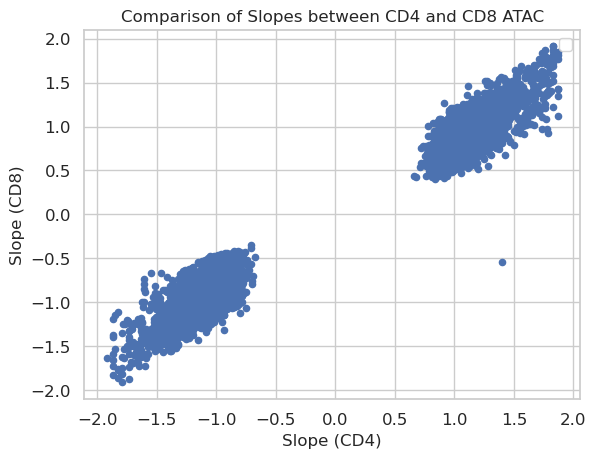

In [47]:
df = ATAC_permuted_CD4.merge(ATAC_nominal_CD8, on = ["var_id", "phe_id"], suffixes = ("_permuted_CD4", "_nominal_CD8"))
print(len(ATAC_permuted_CD4), len(df), len(df) / len(ATAC_permuted_CD4))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Plot the data
fig = df.plot(kind='scatter', x='slope_permuted_CD4', y='slope_nominal_CD8')

# Set the axis labels
plt.xlabel('Slope (CD4)')
plt.ylabel('Slope (CD8)')


# Set the title
plt.title('Comparison of Slopes between CD4 and CD8 ATAC')

# Set the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
fig.get_figure().savefig("output_figs/caqtl_slope_comparison_CD4.png", dpi = 600)
fig.get_figure().savefig("output_figs/caqtl_slope_comparison_CD4.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


7861 6157 0.7832336852817707


<Figure size 800x600 with 0 Axes>

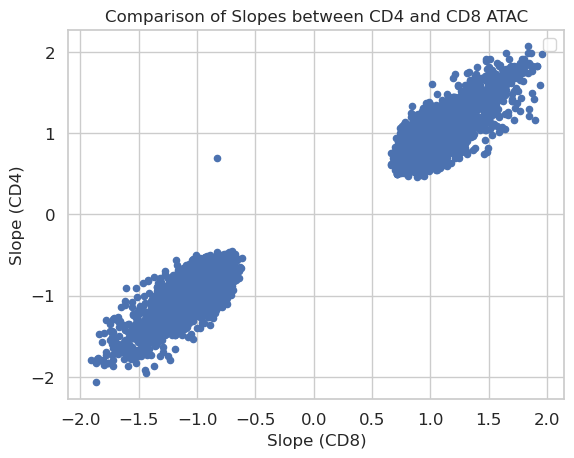

In [50]:
df = ATAC_permuted_CD8.merge(ATAC_nominal_CD4, on = ["var_id", "phe_id"], suffixes = ("_permuted_CD8", "_nominal_CD4"))
print(len(ATAC_permuted_CD8), len(df), len(df) / len(ATAC_permuted_CD8))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Plot the data
fig = df.plot(kind='scatter', x='slope_permuted_CD8', y='slope_nominal_CD4')

# Set the axis labels
plt.xlabel('Slope (CD8)')
plt.ylabel('Slope (CD4)')


# Set the title
plt.title('Comparison of Slopes between CD4 and CD8 ATAC')

# Set the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
fig.get_figure().savefig("output_figs/caqtl_slope_comparison_CD8.png", dpi = 600)
fig.get_figure().savefig("output_figs/caqtl_slope_comparison_CD8.svg")

In [51]:
ins_permuted_CD4 = pd.read_csv(f"{base_dir}/QTLs/HiC/ins_permuted_CD4_FDR.txt", sep = " ")
ins_permuted_CD8 = pd.read_csv(f"{base_dir}/QTLs/HiC/ins_permuted_CD8_FDR.txt", sep = " ")

In [52]:
ins_nominal_CD4 = pd.read_csv(f"{base_dir}/QTLs/HiC/ins_nominal_CD4_merged.txt", sep = " ")
ins_nominal_CD8 = pd.read_csv(f"{base_dir}/QTLs/HiC/ins_nominal_CD8_merged.txt", sep = " ")

In [53]:
ins_permuted_CD4 = ins_permuted_CD4[ins_permuted_CD4["FDR"] < 0.10]
ins_permuted_CD8 = ins_permuted_CD8[ins_permuted_CD8["FDR"] < 0.10]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


7180 5403 0.7525069637883008


<Figure size 800x600 with 0 Axes>

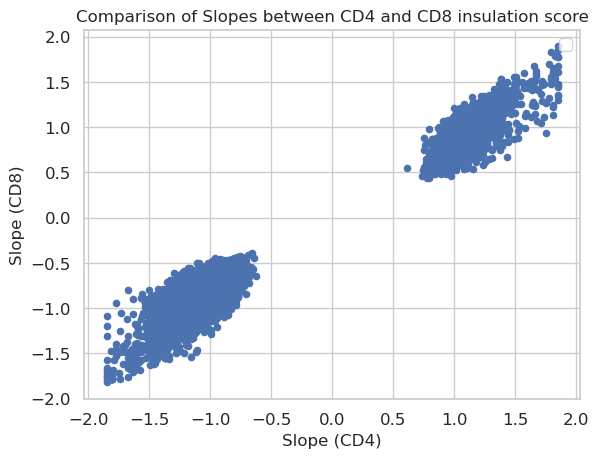

In [54]:
df = ins_permuted_CD4.merge(ins_nominal_CD8, on = ["var_id", "phe_id"], suffixes = ("_permuted_CD4", "_nominal_CD8"))
print(len(ins_permuted_CD4), len(df), len(df) / len(ins_permuted_CD4))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Plot the data
fig = df.plot(kind='scatter', x='slope_permuted_CD4', y='slope_nominal_CD8')

# Set the axis labels
plt.xlabel('Slope (CD4)')
plt.ylabel('Slope (CD8)')


# Set the title
plt.title('Comparison of Slopes between CD4 and CD8 insulation score')

# Set the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
fig.get_figure().savefig("output_figs/insqtl_slope_comparison_CD4.png", dpi = 600)
fig.get_figure().savefig("output_figs/insqtl_slope_comparison_CD4.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8284 6018 0.7264606470304201


<Figure size 800x600 with 0 Axes>

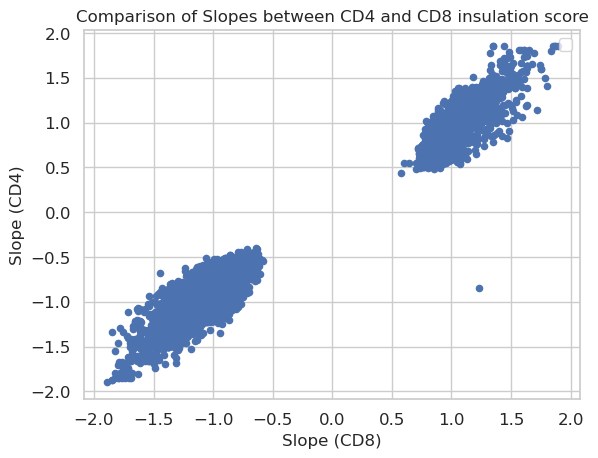

In [55]:
df = ins_permuted_CD8.merge(ins_nominal_CD4, on = ["var_id", "phe_id"], suffixes = ("_permuted_CD8", "_nominal_CD4"))
print(len(ins_permuted_CD8), len(df), len(df) / len(ins_permuted_CD8))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Plot the data
fig = df.plot(kind='scatter', x='slope_permuted_CD8', y='slope_nominal_CD4')

# Set the axis labels
plt.xlabel('Slope (CD8)')
plt.ylabel('Slope (CD4)')


# Set the title
plt.title('Comparison of Slopes between CD4 and CD8 insulation score')

# Set the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
fig.get_figure().savefig("output_figs/insqtl_slope_comparison_CD8.png", dpi = 600)
fig.get_figure().savefig("output_figs/insqtl_slope_comparison_CD8.svg")

In [56]:
loop_permuted_CD4 = pd.read_csv(f"{base_dir}/QTLs/HiC/loop_permuted_CD4_FDR.txt", sep = " ")
loop_permuted_CD8 = pd.read_csv(f"{base_dir}/QTLs/HiC/loop_permuted_CD8_FDR.txt", sep = " ")

In [57]:
loop_nominal_CD4 = pd.read_csv(f"{base_dir}/QTLs/HiC/loop_nominal_CD4_merged.txt", sep = " ")
loop_nominal_CD8 = pd.read_csv(f"{base_dir}/QTLs/HiC/loop_nominal_CD8_merged.txt", sep = " ")

In [58]:
loop_permuted_CD4 = loop_permuted_CD4[loop_permuted_CD4["FDR"] < 0.10]
loop_permuted_CD8 = loop_permuted_CD8[loop_permuted_CD8["FDR"] < 0.10]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


579 524 0.9050086355785838


<Figure size 800x600 with 0 Axes>

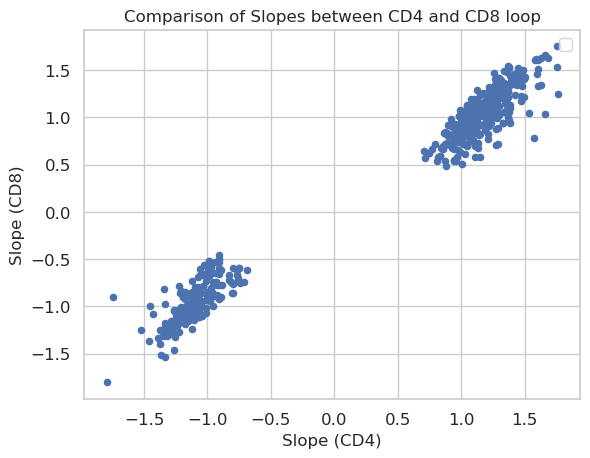

In [59]:
df = loop_permuted_CD4.merge(loop_nominal_CD8, on = ["var_id", "phe_id"], suffixes = ("_permuted_CD4", "_nominal_CD8"))
print(len(loop_permuted_CD4), len(df), len(df) / len(loop_permuted_CD4))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Plot the data
fig = df.plot(kind='scatter', x='slope_permuted_CD4', y='slope_nominal_CD8')

# Set the axis labels
plt.xlabel('Slope (CD4)')
plt.ylabel('Slope (CD8)')


# Set the title
plt.title('Comparison of Slopes between CD4 and CD8 loop')

# Set the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
fig.get_figure().savefig("output_figs/loopqtl_slope_comparison_CD4.png", dpi = 600)
fig.get_figure().savefig("output_figs/loopqtl_slope_comparison_CD4.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


762 654 0.8582677165354331


<Figure size 800x600 with 0 Axes>

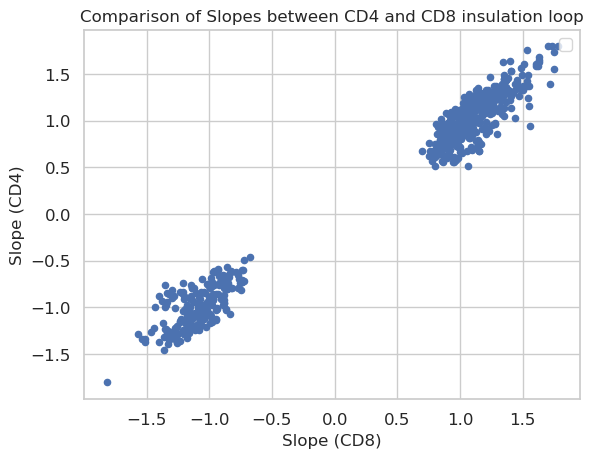

In [60]:
df = loop_permuted_CD8.merge(loop_nominal_CD4, on = ["var_id", "phe_id"], suffixes = ("_permuted_CD8", "_nominal_CD4"))
print(len(loop_permuted_CD8), len(df), len(df) / len(loop_permuted_CD8))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
# Plot the data
fig = df.plot(kind='scatter', x='slope_permuted_CD8', y='slope_nominal_CD4')

# Set the axis labels
plt.xlabel('Slope (CD8)')
plt.ylabel('Slope (CD4)')


# Set the title
plt.title('Comparison of Slopes between CD4 and CD8 insulation loop')

# Set the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.show()
fig.get_figure().savefig("output_figs/loopqtl_slope_comparison_CD8.png", dpi = 600)
fig.get_figure().savefig("output_figs/loopqtl_slope_comparison_CD8.svg")